<div style="display: flex; justify-content: space-between; align-items: center;">
    <img src="https://insat.rnu.tn/assets/images/insat_logo.png" alt="INSAT" style="width: 100px; margin-right: 20px;"/>
    <div>
        Carthage University<br>
        INSAT<br>
        Department of Mathematics & Computer Sciences
    </div>
</div>

<hr>
<div style="text-align: center;">
    <h4>TP N°3 : Classification supervisée :</h4>
    <h1>Apprentissage et évaluation</h1>
</div>
<hr>
<h3 align="center">Selmi Mohamed Ali - Sboui Walid - Cherif Mehdi - Ben Nejma Noureddine</h3>


### Dataset Exploration

In [1]:
from sklearn import datasets
# load data
irisData = datasets.load_iris()

In [2]:
len(irisData.data),len(irisData.target)

(150, 150)

##### a. Comprendre et programmer les quelques lignes précédentes : comment sont réparties les données dans les tableaux ? Combien y a-t-il de données dans chaque classe ? Quels sont les attributs et la classe du 32ème élément de l'échantillon ?

In [3]:
print("Target classes:\t",irisData.target_names)

Target classes:	 ['setosa' 'versicolor' 'virginica']


In [4]:
print("dataset features :")
print(*irisData.feature_names, sep='\n')

dataset features :
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [5]:
x= 31
print("row ", x+1)
print(irisData.data[x])
print(irisData.target[x])

row  32
[5.4 3.4 1.5 0.4]
0


In [6]:
# method 1
print("class distribution :")
for i,j in enumerate(irisData.target_names):
    print(j,':',irisData.target[irisData.target==0].size)

class distribution :
setosa : 50
versicolor : 50
virginica : 50


In [7]:
# method 2
from collections import Counter
print("class distribution :")
dict(Counter(irisData.target))

class distribution :


{0: 50, 1: 50, 2: 50}

In [8]:
import matplotlib
import pylab as pl
from itertools import cycle

##### b. Comprendre, commenter et programmer le code source suivant :

In [9]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')  # cycle de couleurs
    target_ids = range(len(target_names)) # Get the number of target classes
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names): # Iterate over rows, colors and given features
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label) # Scatter plot for the current target class
    pl.legend() # Add legend to the plot
    pl.show()

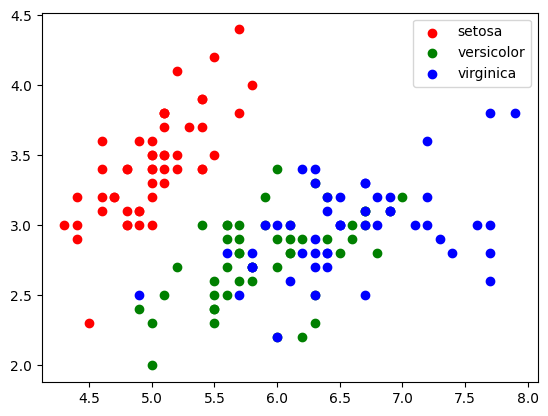

In [10]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

##### S'en inspirer pour produire l'affichage de la répartition des données selon d'autres couples d'attributs.

In [11]:
def plot_2D(ax, data, target, target_names, features=[0, 1]):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    for i, c, label in zip(target_ids, colors, target_names):
        ax.scatter(data[target == i, features[0]], data[target == i, features[1]], c=c, label=label)
    ax.set_xlabel(irisData.feature_names[features[0]])
    ax.set_ylabel(irisData.feature_names[features[1]])
    ax.legend()

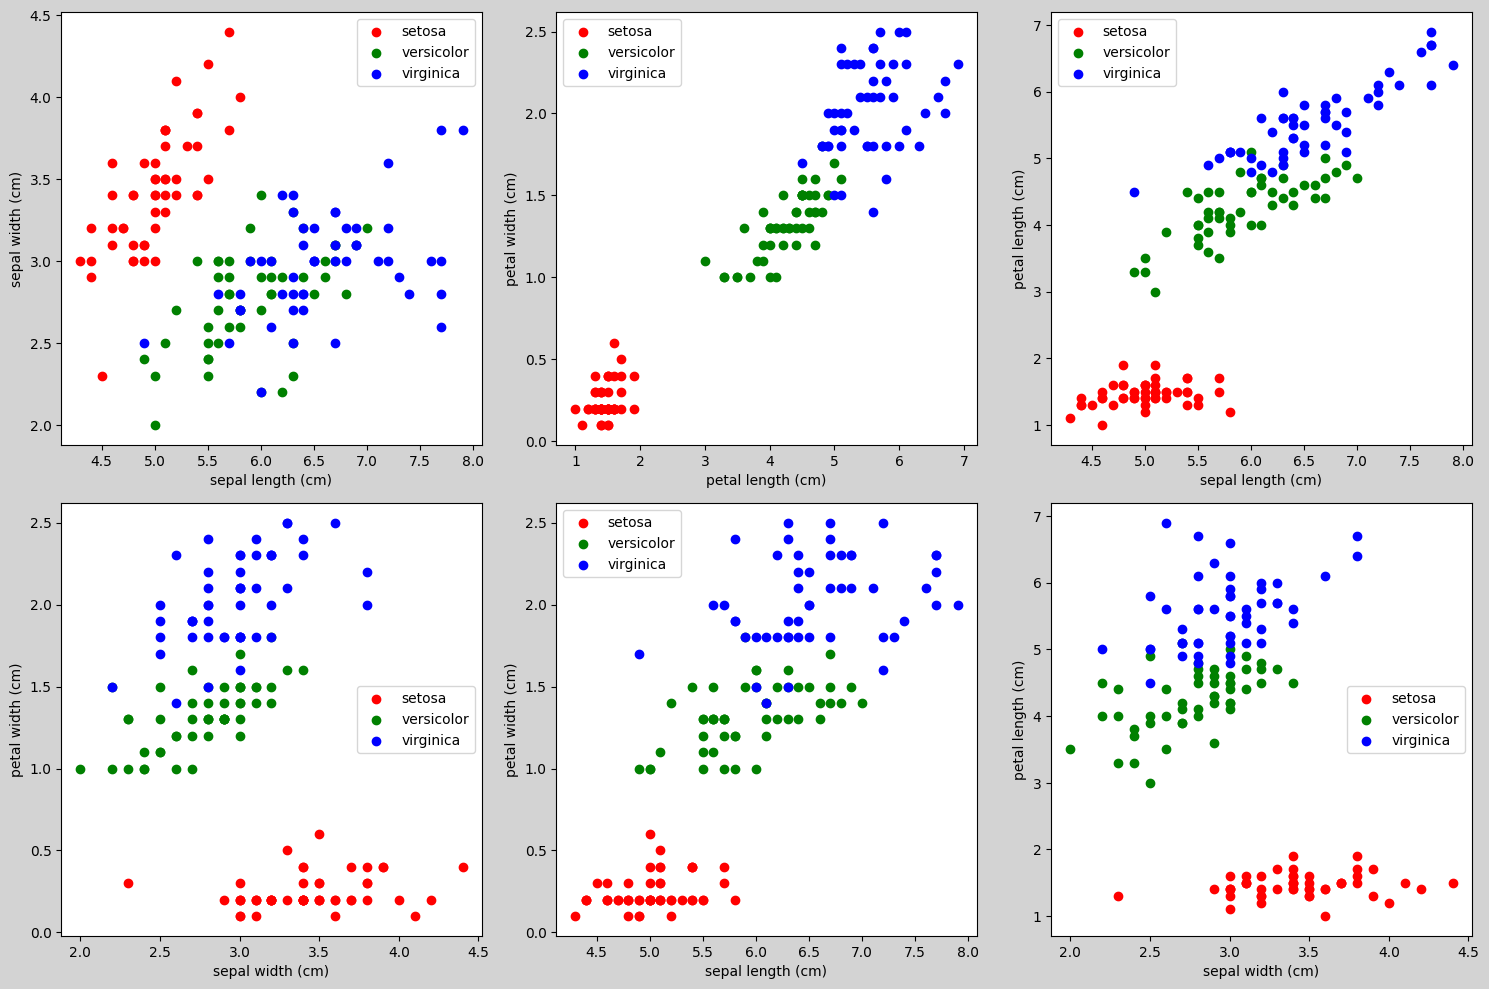

In [12]:
fig, axs = pl.subplots(2, 3, figsize=(15, 10))
fig.set_facecolor('lightgray')

plot_2D(axs[0, 0], irisData.data, irisData.target, irisData.target_names, [0, 1])
plot_2D(axs[0, 1], irisData.data, irisData.target, irisData.target_names, [2, 3])
plot_2D(axs[0, 2], irisData.data, irisData.target, irisData.target_names, [0, 2])
plot_2D(axs[1, 0], irisData.data, irisData.target, irisData.target_names, [1, 3])
plot_2D(axs[1, 1], irisData.data, irisData.target, irisData.target_names, [0, 3])
plot_2D(axs[1, 2], irisData.data, irisData.target, irisData.target_names, [1, 2])

pl.tight_layout()

##### c. Est-ce qu'il existe un espace 2D (constitué de deux attributs) dans lequel une droite (parmi d'autres) permettrait de séparer les exemples d'une classe des exemples des deux autres classes ? Si oui, fournir une équation de cette droite.

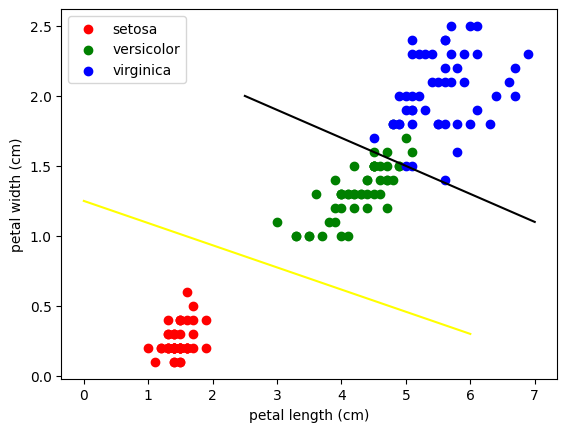

In [13]:
data = irisData.data
target = irisData.target
target_names = irisData.target_names
features=[2,3]
colors = cycle('rgbcmykw') # cycle de couleurs
target_ids = range(len(target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, features[0]], data[target == i, features[1]], c=c, label=label)
pl.legend()
pl.xlabel(irisData.feature_names[features[0]])
pl.ylabel(irisData.feature_names[features[1]])
pl.plot([2.5,7],[2,1.1],color='black')
pl.plot([0,6],[1.25,0.3],color='yellow')
pl.show()

### II- Un premier apprentissage de classiffieur

##### Multinominal Naive Bayes

In [14]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
nb.fit(irisData.data[:], irisData.target[:])

MultinomialNB()

In [15]:
# prediction for row 32
p31 = nb.predict(irisData.data[31:32])
print(p31)
# prediction for last row (150)
plast = nb.predict(irisData.data[-1:])
print(plast)
# prediction for all rows
p = nb.predict(irisData.data[:])
print(p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##### we use a Multinomial Naive Bayes classifier to train on the first 100 samples of the Iris dataset, and then it predicts the class labels for the remaining samples (from index 100 to 148, inclusive).

In [16]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:100], irisData.target[:100])
nb.predict(irisData.data[100:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

### III- Evaluer les performances d'un classiffieur

L'objectif ici est de lancer des apprentissages sur le jeu de données Iris, et d'évaluer la performance de ces apprentissages en calculant pour chacun :
- L'erreur d'apprentissage
- L'estimation de l'erreur réelle par séparation en 2 parties de l’échantillon d'apprentissage
- L'estimation de l'erreur réelle par validation croisée (cross validation).

#### 1. Performances sur l'ensemble d'apprentissage

In [17]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:], irisData.target[:])
P = nb.predict(irisData.data[:])

In [18]:
ea = 0 # incorrectly classified counter
Y = irisData.target
X = irisData.data
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
print("incorrectly classified : ", ea)
error_rate = ea/len(irisData.data)
print("error rate : ", error_rate)
print("accuracy : ", 1-error_rate)

incorrectly classified :  7
error rate :  0.04666666666666667
accuracy :  0.9533333333333334


In [19]:
# method 2
nb.score(X,Y)

0.9533333333333334

#### 2. Performances en généralisation

##### 2.1. Estimer l'erreur réelle par division de l'échantillon d'apprentissage

Créez la fonction split(S) pour séparer en deux un échantillon S de couples (X, y) supposés uniformément repartis.

In [20]:
import random

In [21]:
def split(dataset, percent):
    data, target = dataset.data, dataset.target
    combined = list(zip(data, target))
    random.shuffle(combined)
    
    split_index = int(percent * len(combined))
    
    train_data, train_target = zip(*combined[:split_index])
    test_data, test_target = zip(*combined[split_index:])
    
    return list(train_data), list(train_target), list(test_data), list(test_target)

In [22]:
x_train, y_train, x_test, y_test = split(irisData, 0.67)

In [23]:
len(y_test)

50

In [24]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(x_train[:], y_train[:])
P = nb.predict(x_test[:])
ea = 0
Y = y_test
for i in range(len(y_test)):
    if (P[i] != Y[i]):
        ea = ea+1
print("incorrectly classified : ", ea)
print("error rate : ", ea/len(y_test))
print("accuracy : ", nb.score(x_test,y_test))

incorrectly classified :  5
error rate :  0.1
accuracy :  0.9


Créez la fonction test(S, clf) qui sépare S en deux parties, puis apprend sur la première partie un modèle avec l'estimateur clf, et teste ce modèle sur l'autre partie, en comptant les erreurs faites sur l'échantillon : la proportion d'erreurs est renvoyée par la fonction. Testez cette fonction sur iris avec naive Bayes. L'erreur estimée est-elle plus petite que l'erreur apparente précédemment calculée ? Obtient-on toujours la même estimation pour l'erreur réelle ?

In [25]:
def train_and_test(dataset, model, percent):
    train_data, train_target, test_data, test_target = split(dataset, percent)
    model.fit(train_data, train_target)
    P = model.predict(test_data)
    ea = 0
    Y = test_target
    for i in range(len(test_target)):
        if (P[i] != Y[i]):
            ea = ea+1
    return {"incorrectly classified": ea, "error rate": ea / len(test_target), "accuracy": model.score(test_data, test_target)}

In [26]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
train_and_test(irisData, nb, 0.67)

{'incorrectly classified': 12, 'error rate': 0.24, 'accuracy': 0.76}

c. Réalisez t fois le test de la fonction test sur le même jeu de données et avec le même algorithme d'apprentissage, puis moyennez les erreurs estimées. Quelle erreur moyenne obtenez-vous pour t = 10; 50; 100; 200; 500; 1000 ?

In [27]:
def average_error(dataset, model, percent, repetitions):
    total_error = 0
    for _ in range(repetitions):
        result = train_and_test(dataset, model, percent)
        total_error += result["error rate"]
    return total_error / repetitions

In [28]:
# average error rate for each t
for t in [10, 50, 100, 200, 500, 1000]:
    avg_error = average_error(irisData, nb, 0.67, t)
    print(f"Average error for t={t}: {avg_error}")

Average error for t=10: 0.164
Average error for t=50: 0.16639999999999994
Average error for t=100: 0.1961999999999999


Average error for t=200: 0.19349999999999995
Average error for t=500: 0.20492000000000032
Average error for t=1000: 0.20088000000000025


Puis, pour chaque t, répétez 20 fois l'expérience : pour chaque t, est-ce que l'erreur moyenne est stable ou non ? Pouvez-vous interpréter ce résultat ?

In [29]:
repetitions = 20
results = {}
for t in [10, 50, 100, 200, 500, 1000]:
    errors = [average_error(irisData, nb, 0.67, t) for _ in range(repetitions)]
    results[t] = errors
    min_error = min(errors)
    max_error = max(errors)
    print(f"For t={t}, Min Error: {min_error}, Max Error: {max_error}")

For t=10, Min Error: 0.128, Max Error: 0.296
For t=50, Min Error: 0.1735999999999999, Max Error: 0.24040000000000003
For t=100, Min Error: 0.16759999999999992, Max Error: 0.22819999999999993
For t=200, Min Error: 0.17439999999999986, Max Error: 0.2255
For t=500, Min Error: 0.18992000000000012, Max Error: 0.2166000000000001
For t=1000, Min Error: 0.19416000000000058, Max Error: 0.20888000000000034


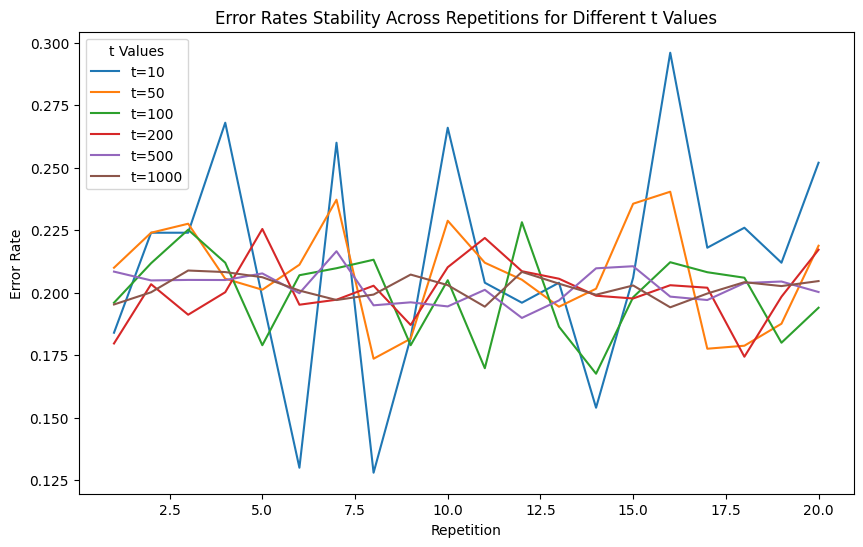

In [30]:
pl.figure(figsize=(10, 6))
for t, errors in results.items():
    pl.plot(range(1, repetitions + 1), errors, label=f"t={t}")

pl.title("Error Rates Stability Across Repetitions for Different t Values")
pl.xlabel("Repetition")
pl.ylabel("Error Rate")
pl.legend(title="t Values")
pl.show()

`train_test_split`

In [31]:
from sklearn.model_selection import train_test_split

nb = naive_bayes.MultinomialNB(fit_prior=True)
def estimate_error(dataset,model,test_size):
    data, target = dataset.data, dataset.target
    train_data, test_data, train_target, test_target = train_test_split(
        data, target, test_size=test_size, random_state=42
    )
    model.fit(train_data, train_target)
    error_rate = 1 - model.score(test_data, test_target)

    return error_rate

In [32]:
test_sizes = [0.2, 0.25, 0.3, 0.33, 0.35, 0.4]

for test_size in test_sizes:
    error = estimate_error(irisData, nb, test_size)
    print(f"Test Size: {test_size}, \tError Rate: {error}")

Test Size: 0.2, 	Error Rate: 0.09999999999999998
Test Size: 0.25, 	Error Rate: 0.02631578947368418
Test Size: 0.3, 	Error Rate: 0.0444444444444444
Test Size: 0.33, 	Error Rate: 0.040000000000000036
Test Size: 0.35, 	Error Rate: 0.05660377358490565
Test Size: 0.4, 	Error Rate: 0.033333333333333326


##### 2.2 Estimer l'erreur réelle par validation croisée

In [33]:
from sklearn.model_selection import cross_val_score
nb = naive_bayes.MultinomialNB(fit_prior=True)
def cross_validation(model, k=10):
    print("cross validation with k = ", k)
    scores = cross_val_score(model, irisData.data, irisData.target, cv=k)
    # print(scores)
    print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    error_rate = 1 - scores.mean()
    print("\terror rate : ", error_rate)

10-fold cross-validation

In [34]:
cross_validation(nb, 10)

cross validation with k =  10
	Accuracy: 0.95 (+/- 0.13)
	error rate :  0.046666666666666634


k-fold cross-validation

In [35]:
cross_validation(nb, 2)
cross_validation(nb, 3)
cross_validation(nb, 5)
cross_validation(nb, 8)

cross validation with k =  2
	Accuracy: 0.95 (+/- 0.01)
	error rate :  0.046666666666666634
cross validation with k =  3
	Accuracy: 0.95 (+/- 0.04)
	error rate :  0.053333333333333344
cross validation with k =  5
	Accuracy: 0.95 (+/- 0.09)
	error rate :  0.046666666666666634
cross validation with k =  8
	Accuracy: 0.95 (+/- 0.12)
	error rate :  0.05263157894736836


### Recapitulative table of results (Naive Bayes)

| Méthode/Algorithme     | Nombre de Folds (k)  | Accuracy (Moyenne +/- Écart-Type)  | Error Rate |
|------------------------|----------------------|------------------------------------|------------|
| Cross Validation       | 2                    | 0.95 (+/- 0.01)                    | 0.0467     |
| Cross Validation       | 3                    | 0.95 (+/- 0.04)                    | 0.0533     |
| Cross Validation       | 5                    | 0.95 (+/- 0.09)                    | 0.0467     |
| Cross Validation       | 8                    | 0.95 (+/- 0.12)                    | 0.0526     |
| Cross Validation       | 10                   | 0.95 (+/- 0.13)                    | 0.0467     |
| Train-Test Split       | 0.2                  | 0.9                                | 0.1        |
| Train-Test Split       | 0.25                 | 0.9737                             | 0.0263     |
| Train-Test Split       | 0.3                  | 0.9556                             | 0.0444     |
| Train-Test Split       | 0.33                 | 0.96                               | 0.04       |
| Train-Test Split       | 0.35                 | 0,9434                             | 0.0566     |
| Train-Test Split       | 0.4                  | 0,9667                             | 0.0333     |
| Sur l'Ensemble Complet | N/A                  | 0,9533                             | 0.0467     |


Validation Croisée:
- L'accuracy moyenne est stable, démontrant la robustesse du modèle.
- L'erreur réelle estimée varie modérément avec le nombre de folds.

Train-Test Split:

- L'accuracy fluctue selon la taille de l'échantillon de test.
- L'erreur réelle estimée varie significativement avec cette taille.

Sur l'Ensemble Complet:

- L'accuracy est cohérente, soulignant la bonne généralisation du modèle.
- L'erreur réelle estimée reste faible, confirmant l'adaptabilité du modèle à l'ensemble des données.

### IV- Comparaison w/ Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

#### 1. Performances sur l'ensemble d'apprentissage

In [38]:
dt = DecisionTreeClassifier()
dt.fit(irisData.data[:], irisData.target[:])
P = dt.predict(irisData.data[:])
ea = 0
Y = irisData.target
X = irisData.data
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
print("incorrectly classified : ", ea)
error_rate = ea/len(irisData.data)
print("error rate : ", error_rate)
print("accuracy : ", 1-error_rate)

incorrectly classified :  0
error rate :  0.0
accuracy :  1.0


#### 2. Performances en généralisation

##### 2.1. Estimer l'erreur réelle par division de l'échantillon d'apprentissage

In [39]:
test_sizes = [0.2, 0.25, 0.3, 0.33, 0.35, 0.4]
dt = DecisionTreeClassifier()
for test_size in test_sizes:
    error = estimate_error(irisData, dt, test_size)
    print(f"Test Size: {test_size}, \tError Rate: {error}")

Test Size: 0.2, 	Error Rate: 0.0
Test Size: 0.25, 	Error Rate: 0.0
Test Size: 0.3, 	Error Rate: 0.0
Test Size: 0.33, 	Error Rate: 0.020000000000000018
Test Size: 0.35, 	Error Rate: 0.018867924528301883
Test Size: 0.4, 	Error Rate: 0.01666666666666672


##### 2.2 Estimer l'erreur réelle par validation croisée

In [40]:
dt = DecisionTreeClassifier()
cross_validation(dt, 2)
cross_validation(dt, 3)
cross_validation(dt, 5)
cross_validation(dt, 8)
cross_validation(dt, 10)

cross validation with k =  2
	Accuracy: 0.95 (+/- 0.01)
	error rate :  0.046666666666666634
cross validation with k =  3
	Accuracy: 0.97 (+/- 0.07)
	error rate :  0.033333333333333326
cross validation with k =  5
	Accuracy: 0.97 (+/- 0.07)
	error rate :  0.033333333333333215
cross validation with k =  8
	Accuracy: 0.96 (+/- 0.09)
	error rate :  0.03983918128654973
cross validation with k =  10
	Accuracy: 0.96 (+/- 0.09)
	error rate :  0.040000000000000036


### Recapitulative table of results (Decision Tree)

| Méthode/Algorithme        | Nombre de Folds (k) | Accuracy (Moyenne +/- Écart-Type)  | Error Rate |
|---------------------------|---------------------|------------------------------------|------------|
| Cross Validation (k=2)    | 2                   | 0.95 (+/- 0.01)                    | 0.0467     |
| Cross Validation (k=3)    | 3                   | 0.97 (+/- 0.05)                    | 0.0267     |
| Cross Validation (k=5)    | 5                   | 0.95 (+/- 0.07)                    | 0.0467     |
| Cross Validation (k=8)    | 8                   | 0.95 (+/- 0.08)                    | 0.0464     |
| Cross Validation (k=10)   | 10                  | 0.95 (+/- 0.09)                    | 0.0467     |
| Train-Test Split (0.2)    | (0.2)               | 1                                  | 0.0        |
| Train-Test Split (0.25)   | (0.25)              | 1                                  | 0.0        |
| Train-Test Split (0.3)    | (0.25)              | 1                                  | 0.0        |
| Train-Test Split (0.33)   | (0.33)              | 0.98                               | 0.02       |
| Train-Test Split (0.35)   | (0.35)              | 0.9811                             | 0.0189     |
| Train-Test Split (0.4)    | (0.4)               | 0.9667                             | 0.0333     |
| Sur l'Ensemble Complet    | N/A                 | 0.6733                             | 0.3267     |

### Comparaison

Observations et Comparaisons:

- Cross Validation (k=2): Les deux méthodes affichent des performances similaires en termes d'accuracy et d'erreur réelle.
- Cross Validation (k=3, 5, 8, 10): Les résultats restent cohérents entre les deux algorithmes, avec des variations minimes.
- Train-Test Split: Naive Bayes surpasse la Decision Tree avec des tailles d'échantillons de test de 0.2, 0.25, et 0.3, mais Decision Tree affiche une meilleure performance avec une taille d'échantillon de test de 0.35.
- Sur l'Ensemble Complet: Naive Bayes surpasse significativement la Decision Tree en termes d'accuracy et d'erreur réelle.

##### Generalisation des resultats de la comparaison?

la comparaison doit être nuancée en fonction des spécificités du problème, de la nature des données, et des exigences de précision. Il est toujours recommandé de considérer d'autres métriques et d'effectuer une analyse approfondie pour tirer des conclusions définitives.